# Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Chargement des données


In [2]:
data_folder = Path("../../data/communities/processed_data/")
all_communities = pd.read_csv(data_folder / "infos_collectivites.csv")
selected_communities = pd.read_csv(data_folder / "selected_communities.csv")

# Affichage des 5 premières lignes des communautés sélectionnées

In [3]:
selected_communities.head()

,nom,SIREN,type,COG,COG_3digits,code_departement,code_departement_3digits,code_region,population,EPCI,url-ptf,url-datagouv,id-datagouv,merge,ptf,trancheEffectifsUniteLegale,EffectifsSup50
0,Guadeloupe,239710015,REG,01,NaN,NaN,NaN,NaN,396153,NaN,https://regionguadeloupe.opendatasoft.com/expl...,NaN,NaN,ptf,KaruData,42.0,True
1,Martinique,200055507,CTU,02,NaN,NaN,NaN,NaN,377711,NaN,NaN,NaN,NaN,NaN,NaN,51.0,True
2,Guyane,200052678,CTU,03,NaN,NaN,NaN,NaN,271124,NaN,NaN,NaN,NaN,NaN,NaN,51.0,True
3,La Réunion,239740012,REG,04,NaN,NaN,NaN,NaN,863063,NaN,https://data.regionreunion.com/explore/?disjun...,NaN,NaN,ptf,La Réunion,51.0,True
4,Île-de-France,237500079,REG,11,NaN,NaN,NaN,NaN,12291279,NaN,https://data.iledefrance.fr/explore/?refine.pu...,https://www.data.gouv.fr/fr/organizations/534f...,534fffa8a3a7292c64a780c8,ptf+datagouv,"Ile-de-France, DataGouv",53.0,True


# Statistiques descriptives des communautés sélectionnées


In [4]:
# Fonction de formatage personnalisée pour les nombres flottants
def custom_float_format(x):
    if abs(x) < 100000000:
        return '{:,.0f}'.format(x)
    else:
        return '{:,.1e}'.format(x)

# Définir l'affichage des nombres flottants en utilisant la fonction de formatage personnalisée
pd.options.display.float_format = custom_float_format

selected_communities.describe()

,SIREN,population,EPCI,trancheEffectifsUniteLegale
count,"4,510","4,510","3,126","3,240"
mean,2.2e+08,"56,576",2.2e+08,28
std,"12,603,583","356,724","22,204,459",9
min,2.0e+08,"3,501",2.0e+08,21
25%,2.1e+08,"5,487",2.0e+08,21
50%,2.2e+08,"9,719",2.0e+08,22
75%,2.2e+08,"23,999",2.4e+08,32
max,2.5e+08,"12,291,279",2.5e+08,53


# Répartition des types de communautés sélectionnées


In [5]:
selected_communities['type'].value_counts()

COM    3127
CC      995
CA      224
DEP      98
MET      24
REG      14
CU       14
EPT      11
CTU       3
Name: type, dtype: int64

In [10]:
all_communities['type'].value_counts()

COM    34969
CC       995
CA       224
DEP       98
MET       24
REG       14
CU        14
EPT       11
CTU        3
Name: type, dtype: int64

# Histogramme de la population des communautés sélectionnées


<Axes: >

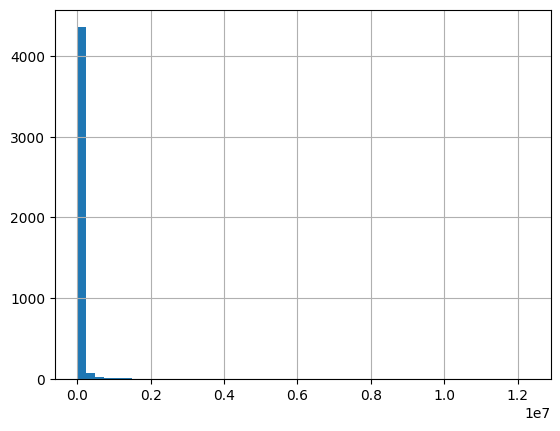

In [6]:
selected_communities['population'].hist(bins=50)

# Nombre et pourcentage de types de communautés sélectionnées


In [7]:
type_counts_selected = selected_communities["type"].value_counts()
type_counts_selected

COM    3127
CC      995
CA      224
DEP      98
MET      24
REG      14
CU       14
EPT      11
CTU       3
Name: type, dtype: int64

In [8]:
type_counts_selected = selected_communities["type"].value_counts(normalize=True) * 100
type_counts_percent = type_counts_selected.round(2).astype(str) + '%'
type_counts_combined = type_counts_selected.to_frame().join(type_counts_percent.to_frame('percentage'))
type_counts_combined

,type,percentage
COM,69,69.33%
CC,22,22.06%
CA,5,4.97%
DEP,2,2.17%
MET,1,0.53%
REG,0,0.31%
CU,0,0.31%
EPT,0,0.24%
CTU,0,0.07%


# Valeurs manquantes par colonne


In [9]:
missing_values = selected_communities.isnull().sum()
print("Nombre de valeurs manquantes par colonne :\n", missing_values)

Nombre de valeurs manquantes par colonne :
 nom                               0
SIREN                             0
type                              0
COG                            1268
COG_3digits                    4412
code_departement                115
code_departement_3digits        115
code_region                      17
population                        0
EPCI                           1384
url-ptf                        4160
url-datagouv                   4097
id-datagouv                    4101
merge                          3904
ptf                            3931
trancheEffectifsUniteLegale    1270
EffectifsSup50                    0
dtype: int64
